In [ ]:
## This code was last modified on 27/11/2025

## The code calculates the number of Pauli strings required to encode the 0+1 supersymmetric Hamiltonian
## for three supersymmetric potentials (HO, DW, and AHO). It then fits the data using the following function: y = a + b*x + c*x*log2(x)

In [ ]:
# Essential information about the structure of the code for each block
"""
Code blocks structure
1) Load all libraries module
2) User choices
3) Custom functions needed
4) Calculate the pauli strings
5) Fitting with y = a + b*x + c*x*log2(x)
6) log-log plot
"""

'\nCode blocks structure\n1) Load all libraries module\n2) Function needed\n3) User choices\n4)loop to calculate the pauli strings\n5) Fitting with a straight line\n6) Fitting with a line plus a log term\n\n'

In [3]:
## Section importing all needed libraries modules

import sys
#Append the code's directory to the interpreter to search for files
sys.path.append('..')

#Importing the Hamiltonian from the file (Hamiltonian_SQM_0p1.py) inside the folder (hamiltonian_SQM)
from hamiltonian_SQM.Hamiltonian_SQM_0p1 import *

# Needed to convert the Hamiltonian into pauli gates
from qiskit.quantum_info.operators import Operator
from qiskit.quantum_info import SparsePauliOp

#Packages for interacting with the operating system
import os

#Packages for numerical calculation
import statistics
import numpy as np

import matplotlib.pyplot as plt


from scipy.sparse.linalg import eigs

#For eigenvalues and eigenvectors
from numpy import linalg 


#pakages needed 
from scipy.sparse import diags_array
from scipy.sparse.linalg import matrix_power

# Package needed for the fit
from scipy.optimize import curve_fit

In [ ]:
## Define user choice

# Parameters for the construction of the Hamiltonian
superpotential = "DW"                   # Chose a superpontentials "HO" Harmonic Oscillator; "DW" Double Well; "AHO" Anharmonic Oscillator 
m = 1                                   # Chose the bosonic and fermionic mass
g = 1                                   # Chose the g interaction strenght present in AHO and DW
mu = 1                                  # Chose the mu interaction strenght present in DW

H_full_or_block = "Full"                # Chose the "Full" for the full Hamiltonian or "Block" for the lower block

In [ ]:
#Defining all needed functions

# Function to create a compact string version for number in scientific notation 
def SnString(number):
    # Convert a number in scientific notation
    a = '%E' % number
    return a.split('E')[0].rstrip('0').rstrip('.') + 'e' + a.split('E')[1]
#============================================================================================================

# Function to convert a numbers in scientific notation using latex
def latex_number_SN(number):
    a = '%.4E' % number
    return "$"+str(a.split('E')[0].rstrip('0').rstrip('.'))+ "\u005c" + "mathrm{e}"+ "{"+str(a.split('E')[1])+"}"+ "$"

#============================================================================================================


# Function used for fitting the Npaulis y = a + b*x + c*x*log2(x)
def model(x, a, b, c):
    return a + b * x + c * x * np.log2(x)

#=============================================================================================================


# Function used for the log-log plot Npaulis y = 2^( x*a + b - c*x*log2(x) )
def plotting_function(x, a, b, c):
    return 2**(x*a + b - c * np.log2(x))

#=============================================================================================================

In [ ]:
#Calculate the number of pauli string for the q and p operators in the Fock basis:

N_bosons_list = [2**(n) for n in range(1, 13 + 1)]

print(r"Lambda     matrix_size       N_qubits      N_paulis")

latex_string_list=[]

pauli_list=[]

N_qubits_list=[]

for i in N_bosons_list:

    # Calculate the Hamiltonian
    # Calculate the Hamiltonian 
    hamiltonian = Hamiltonian_SQM_0p1(superpotential, n_bosonic_modes = i, m = m, g = g, mu = mu)

    #Dictionary to handle the selection of full or block Hamiltonian 
    N_bosonic_modes=i
    H_full_or_block_dict = {
        "Full": hamiltonian.toarray(),
        "Block": hamiltonian.toarray()[i:2*i,i:2*i]
        }

    hamiltonian_array = H_full_or_block_dict.get(H_full_or_block, "Choice not present! type " + str([i for i in H_full_or_block_dict.keys()]))


    Hamiltonian_op = SparsePauliOp.from_operator(hamiltonian_array, atol = 1e-18)
        
    N_qubits = Hamiltonian_op.num_qubits

    N_paulis = Hamiltonian_op.size

    matrix_size = len(hamiltonian_array)

    pauli_list.append(N_paulis)

    N_qubits_list.append(N_qubits)
    
    print(f"{i}     {matrix_size}       {N_qubits}      {N_paulis}")
    
    latex_string_list.append(f"{i}" +" & "+f"${matrix_size}" + "\u005c"+"times " + f"{matrix_size}$" +" & " + f"{N_qubits}" + " & "+ f"{N_paulis}" +"\u005c"+"\u005c")


# Print all lines inside a file
with open(os.path.join(f"LateX_C_pauli_DW_sho_tol_em18_m_{m}__mu_{mu}_.txt"), 'a') as file:                            
            for row in latex_string_list:
                    print(row, file = file)
file.close()


Lambda     matrix_size       N_qubits      N_paulis
2     4       2      4
4     8       3      14
8     16       4      48
16     32       5      136
32     64       6      352
64     128       7      854
128     256       8      1990
256     512       9      4450
512     1024       10      9874
1024     2048       11      21202
2048     4096       12      45008
4096     8192       13      95253
8192     16384       14      200789


Fit H operator pauli string with the following curve: y = a + b*x + c*x*log2(x)
Initial x point: 3
R-squared: 1.000
Mean Squared Error (MSE): 0.000
Root Mean Squared Error (RMSE): 0.001


Optimized parameters: a = 0.8397 ± 0.0079, b = -1.7047 ± 0.0684, c = -1.9803 ± 0.0446
Curve equation: y = 0.8397 + -1.7047*x + -1.9803*x*log2(x)


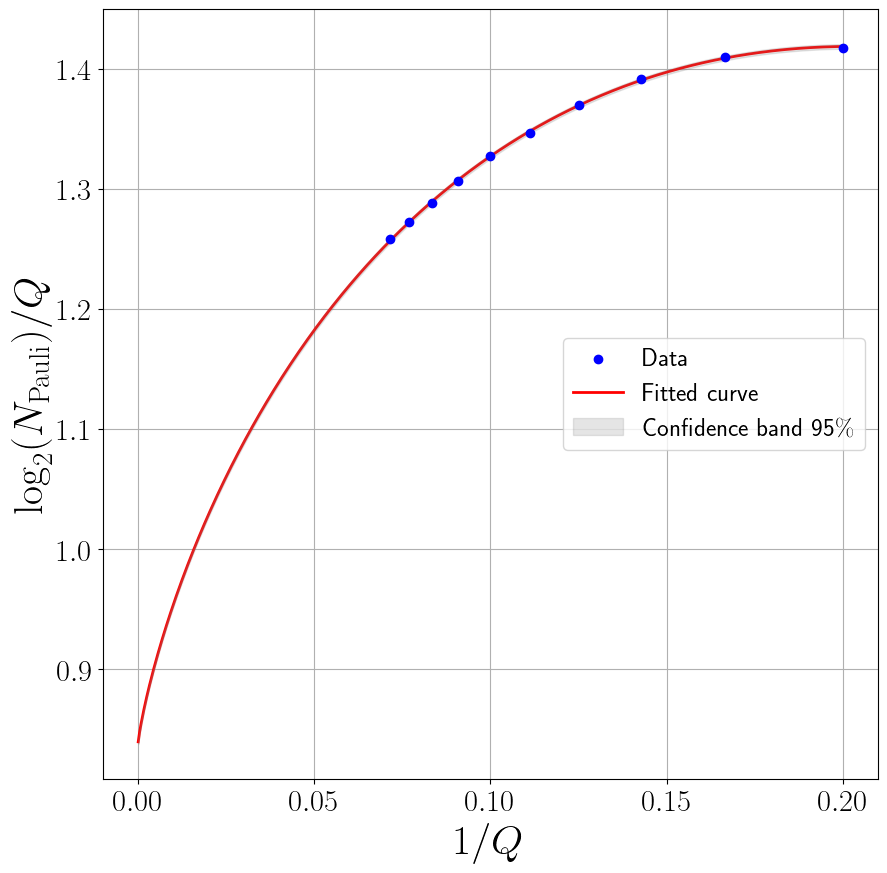

In [ ]:
print("Fit H operator pauli string with the following curve: y = a + b*x + c*x*log2(x)")

#Select the pointa for the fitting, 0 --> all points, 1--> cut the first point and so on.
initial_index= 3


# Enter the data here
x_data = np.array([1 / a for a in  N_qubits_list])[initial_index:]
y_data = np.array([np.log2(a) / b for a, b in zip(pauli_list, N_qubits_list)])[initial_index:]


# Define the model function: y = a + b*x + c*x*log2(x)
def model(x, a, b, c):
    return a + b * x + c * x * np.log2(x)


# Fit the data to the model using curve_fit
popt, pcov = curve_fit(model, x_data, y_data, p0=[1, 1, 1])

# popt contains the optimized parameters [a, b, c]
a_fit, b_fit, c_fit = popt

# The standard errors of the fitted parameters are the square root of the diagonal elements of the covariance matrix
parameter_errors = np.sqrt(np.diag(pcov))

# Extract standard errors for each parameter
a_error, b_error, c_error = parameter_errors

# Predicted y values from the model
y_pred = model(x_data, *popt)

# Residuals (difference between observed and predicted values)
residuals = y_data - y_pred

# R-squared
ss_res = np.sum(residuals**2)  # Residual sum of squares
ss_tot = np.sum((y_data - np.mean(y_data))**2)  # Total sum of squares
r_squared = 1 - (ss_res / ss_tot)

# Mean Squared Error (MSE)
mse = np.mean(residuals**2)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate the residual standard devition
std_residuals  = np.std(residuals)


# Output the metrics

print(f"Initial x point: {initial_index}")
# Print the results
print(f"R-squared: {r_squared:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")

print("\n")

# Output the coefficients and their errors
print(f"Optimized parameters: a = {a_fit:.4f} ± {a_error:.4f}, b = {b_fit:.4f} ± {b_error:.4f}, c = {c_fit:.4f} ± {c_error:.4f}")

# Output the line's equation
print(f"Curve equation: y = {a_fit:.4f} + {b_fit:.4f}*x + {c_fit:.4f}*x*log2(x)")

#=============================================================================================


# Predicted y values from the model
y_pred = model(x_data, *popt)

# Set plot size
plt.figure(figsize=(10,10))

# Enable LaTeX-style formatting globally
plt.rcParams['text.usetex'] = True

#Plot title and axis labels
fontsize = 22


# Plot the data and the fitted curve
plt.scatter(x_data, y_data, label="Data", color='blue',zorder=3)

#Plot fitted curve
# Generate a range of x-values for a smooth curve (continuous way)
x_fine = np.linspace(1e-6, max(x_data), 500) #min(x_data)
y_fine = model(x_fine, *popt)
plt.plot(x_fine, y_fine, label="Fitted curve", color='red', linewidth=2, zorder=2)


#plt.title("Double Well  "+ r"$( \frac{1}{2}m\hat{q}^2 +g \left( \frac{1}{3}\hat{q}^3 + \mu^2 \hat{q}  \right))$"  +"   Fitting function  "+ "y = a + b*x + c*x*log2(x)", fontsize = fontsize)

# Ticks for x-axis
plt.xticks(fontsize = fontsize) #x_data,

# Ticks for y-axis
plt.yticks(fontsize = fontsize) 

# Add labels and title
plt.xlabel(r'$1/Q$', fontsize = 30)

plt.ylabel(r"$\log_2(N_{\rm Pauli}) /Q$", fontsize = 30)

#plt.title('Curve Fitting: y = a + b*x + c*x*log2(x)')


#==========================================
# Create a confidence band (we use 95% confidence level here)
confidence_interval = 1.96 * std_residuals  # 95% confidence interval (approx. 1.96 * std dev)

# Plot the upper and lower bounds of the confidence band
plt.fill_between(x_fine, y_fine - confidence_interval, y_fine + confidence_interval, color='gray', alpha=0.2, label=r"Confidence band 95$\%$",zorder=2)

#==========================================

#==========================================
# x ticks
plt.xticks([0.00, 0.05, 0.1, 0.15, 0.2])

#plt.xlim(0, 0.25)
#==========================================


plt.grid(True,zorder=1)

plt.legend(fontsize = 18, loc='center right')

plt.savefig('Paulis_C_DW_log2_latex_f1__Q5_Large_600.png', bbox_inches='tight', format='png', dpi=600)

plt.show()


<>:70: SyntaxWarning: invalid escape sequence '\%'
<>:70: SyntaxWarning: invalid escape sequence '\%'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8768\141988304.py:70: SyntaxWarning: invalid escape sequence '\%'
  """


Fit H operator pauli string with the following curve: y = a + b*x + c*x*log2(x)


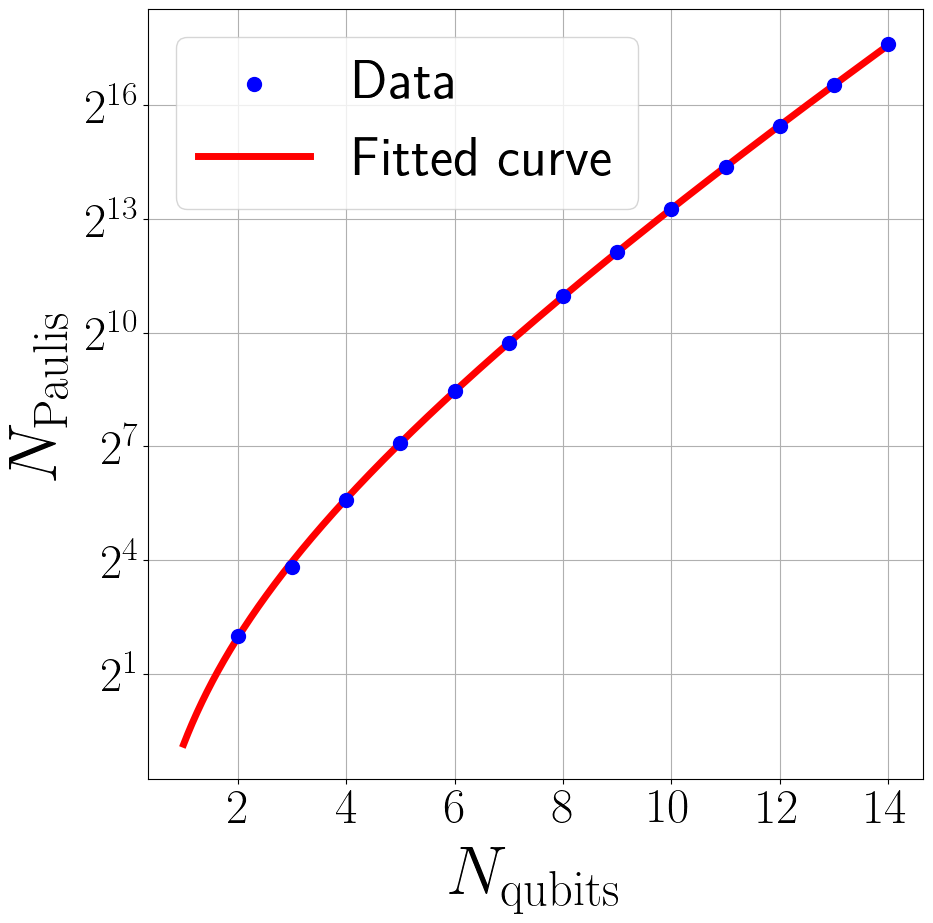

In [ ]:
## In this section we use a log-log plot

print("Fit H operator pauli string with the following curve: y = a*x + b - c*log2(1/x)")

#Select the pointa for the fitting, 0 --> all points, 1--> cut the first point and so on.
initial_index= 0


# Enter the data here
x_data_new = np.array([a for a in  N_qubits_list])[initial_index:]
y_data_new = np.array([a for a in pauli_list])[initial_index:]


# Set plot size
plt.figure(figsize=(10,10))

# Enable LaTeX-style formatting globally
plt.rcParams['text.usetex'] = True

#Plot title and axis labels
fontsize = 35


# Set logarithmic scale for x and y axes with base 2
#plt.xscale('log', base=2)
plt.yscale('log', base=2)

# Plot the data and the fitted curve
#Plot the data 
plt.scatter(x_data_new, y_data_new, label="Data", color='blue', s=100, zorder=3)


#plt.title("Double Well  "+ r"$( \frac{1}{2}m\hat{q}^2 +g \left( \frac{1}{3}\hat{q}^3 + \mu^2 \hat{q}  \right))$", fontsize = fontsize)

# Ticks for x-axis
plt.xticks(fontsize = fontsize) #x_data,

# Ticks for y-axis
plt.yticks(fontsize = fontsize) 

# Add labels and title
plt.xlabel(r'$N_{\rm qubits}$', fontsize = 50, labelpad=10)

plt.ylabel(r"$N_{\rm Paulis}$", fontsize = 50, labelpad=10)


#Plot y = 2^x
x_2tox = np.linspace(1, max(x_data_new), 1000) #min(x_data)

y_fit_function = plotting_function(x_2tox, *popt)

plt.plot(x_2tox, y_fit_function, label="Fitted curve", color='red', linewidth=5, zorder=2)


"""
# Plot the upper and lower bounds of the confidence band
#==========================================
# Create a confidence band (we use 95% confidence level here)
confidence_interval = 1.96 * std_residuals  # 95% confidence interval (approx. 1.96 * std dev)

plt.fill_between(x_2tox, y_fit_function - confidence_interval, y_fit_function + confidence_interval, color='gray', alpha=0.2, label=r"Confidence band 95$\%$", zorder=1)
#==========================================
"""


plt.grid(True,zorder=1)

plt.legend(fontsize = 40, loc='upper left')

plt.savefig('Paulis_C_DW_logY_latex_Large_600.pdf', bbox_inches='tight', format='pdf', dpi=600)

plt.show()
